In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context("paper")

## Import data

In [3]:
df = pd.read_csv('TandC.csv', decimal=".")

In [4]:
print(df.shape)
df.head()

(156, 60)


,Subjects,Time,Type,Testosterone,Cortisol,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,MR01,0,0,12.00,303.60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MR02,0,0,15.70,394.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MR03,0,0,16.50,560.30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MR04,0,0,14.60,601.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MR05,0,0,28.70,532.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop all unnamed columns

In [5]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
print(df.shape)
df.head()

(156, 5)


,Subjects,Time,Type,Testosterone,Cortisol
0,MR01,0,0,12.00,303.60
1,MR02,0,0,15.70,394.70
2,MR03,0,0,16.50,560.30
3,MR04,0,0,14.60,601.70
4,MR05,0,0,28.70,532.70


 ## Check types of data if any strings instead of numbers for values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Subjects      156 non-null    object
 1   Time          156 non-null    int64 
 2   Type          156 non-null    int64 
 3   Testosterone  156 non-null    object
 4   Cortisol      156 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.2+ KB


## Change them into numeric

In [7]:
df['Testosterone']= pd.to_numeric(df['Testosterone'], errors='coerce')
df['Cortisol']= pd.to_numeric(df['Cortisol'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Subjects      156 non-null    object 
 1   Time          156 non-null    int64  
 2   Type          156 non-null    int64  
 3   Testosterone  154 non-null    float64
 4   Cortisol      154 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 6.2+ KB


In [49]:
df.head()

,Subjects,Time,Type,Testosterone,Cortisol
0,MR01,0,0,12.0,303.6
1,MR02,0,0,15.7,394.7
2,MR03,0,0,16.5,560.3
3,MR04,0,0,14.6,601.7
4,MR05,0,0,28.7,532.7


In [53]:
df.groupby(['Time','Type'])[['Testosterone','Cortisol']].agg(['mean','std'])

Testosterone               Cortisol            
                  mean        std        mean         std
Time Type                                                
0    0       18.694737   5.449421  441.681579  120.258309
     1       18.535897   6.043373  427.307692   97.872738
1    0       19.041026   6.383231  282.651282   88.127309
     1       33.760526  11.099319  273.742105   80.672309

In [43]:
df[df.isna().any(axis=1)]

,Subjects,Time,Type,Testosterone,Cortisol
20,MR24,0,0,NaN,NaN
138,MR25,1,1,NaN,NaN


### ANOVA  (Testosterone)

In [27]:
aov = pg.rm_anova(data=df,dv ='Testosterone', within = ['Time','Type'], subject = 'Subjects' , correction = 'True')
display(aov.round(2))

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Time,2196.83,1,38,2196.83,84.21,0.0,0.0,0.69,1.0
1,Type,2229.30,1,38,2229.30,64.99,0.0,0.0,0.63,1.0
2,Time * Type,2212.26,1,38,2212.26,106.22,0.0,0.0,0.74,1.0


In [17]:
aov = pg.rm_anova(data=df[df.Type==0],dv ='Testosterone', within = ['Time'], subject = 'Subjects' , correction = 'True')
display(aov)
posthocs = pg.pairwise_ttests(dv='Testosterone', within = ['Time'], subject = 'Subjects', data=df[df.Type==0], padjust='fdr_bh')
display(posthocs)

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Time,1,37,0.901888,0.348438,0.023795,1.0


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Time,0,1,True,True,-0.949678,37.0,two-sided,0.348438,0.266,-0.081931


### ANOVA and posthoc t-test for Testosterone condition

In [19]:
aov = pg.rm_anova(data=df[df.Type==1],dv ='Testosterone', within = ['Time'], subject = 'Subjects' , correction = 'True')
display(aov)
posthocs = pg.pairwise_ttests(dv='Testosterone', within = ['Time'], subject = 'Subjects', data=df[df.Type==1], padjust='fdr_bh')
display(posthocs)

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Time,1,37,95.205026,8.925103e-12,0.720132,1.0


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Time,0,1,True,True,-9.757306,37.0,two-sided,8.925103e-12,1.016e+09,-1.689205


### ANOVA (Cortisol)

In [28]:
aov = pg.rm_anova(data=df,dv ='Cortisol', within = ['Time','Type'], subject = 'Subjects' , correction = 'True')
display(aov.round(2))

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Time,959571.57,1,38,959571.57,166.66,0.00,0.00,0.81,1.0
1,Type,4789.25,1,38,4789.25,1.01,0.32,0.32,0.03,1.0
2,Time * Type,829.97,1,38,829.97,0.16,0.69,0.69,0.00,1.0


In [21]:
aov = pg.rm_anova(data=df[df.Type==0],dv ='Cortisol', within = ['Time'], subject = 'Subjects' , correction = 'True')
display(aov)
posthocs = pg.pairwise_ttests(dv='Cortisol', within = ['Time'], subject = 'Subjects', data=df[df.Type==0], padjust='fdr_bh')
display(posthocs)

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Time,1,37,53.215611,1.151082e-08,0.589871,1.0


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Time,0,1,True,True,7.294903,37.0,two-sided,1.151082e-08,1.129e+06,1.489398


In [30]:
posthocs = pg.pairwise_ttests(dv='Testosterone', within = ['Time', 'Type'], subject = 'Subjects', data=df, padjust='fdr_bh')
display(posthocs)

,Contrast,Time,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Time,-,0,1,True,True,-9.702245,38.0,two-sided,7.855648e-12,NaN,NaN,1.15e+09,-1.208171
1,Type,-,0,1,True,True,-7.069706,38.0,two-sided,1.979679e-08,NaN,NaN,6.76e+05,-1.067336
2,Time * Type,0,0,1,True,True,-0.048320,37.0,two-sided,9.617209e-01,9.617209e-01,fdr_bh,0.175,-0.004996
3,Time * Type,1,0,1,True,True,-9.046428,37.0,two-sided,6.547399e-11,1.309480e-10,fdr_bh,1.52e+08,-1.672905


In [31]:
aov = pg.rm_anova(data=df[df.Type==1],dv ='Cortisol', within = ['Time'], subject = 'Subjects' , correction = 'True')
display(aov)
posthocs = pg.pairwise_ttests(dv='Cortisol', within = ['Time'], subject = 'Subjects', data=df[df.Type==1], padjust='fdr_bh')
display(posthocs)

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Time,1,37,81.765813,6.622120e-11,0.688463,1.0


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Time,0,1,True,True,9.042445,37.0,two-sided,6.622120e-11,1.503e+08,1.673297


## Plot boxplot with values for Testosterone

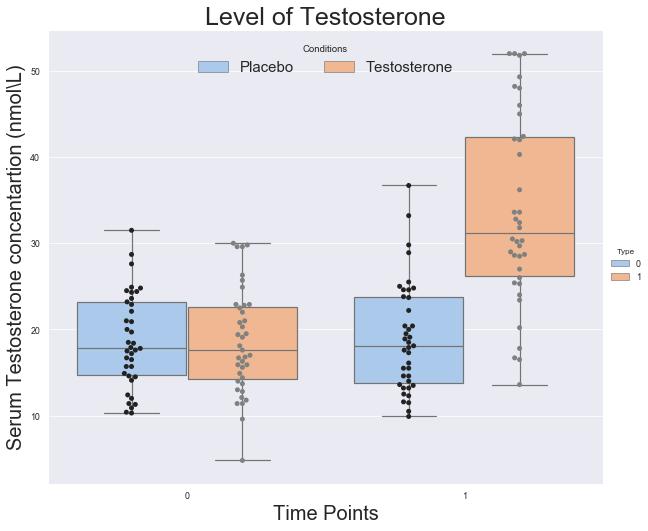

In [9]:

g = sns.catplot(x="Time", y="Testosterone",hue="Type", data=df, kind="box",palette="pastel", height=7,aspect=1.2);
g = sns.swarmplot(x="Time", y="Testosterone",hue="Type",data=df,color="grey", edgecolor="black", dodge=True);
plt.title('Level of Testosterone', fontsize=25)
# add legends
handles, _ = g.get_legend_handles_labels()
g.legend(handles, ["Placebo", "Testosterone"],title="Conditions", prop={"size":15},frameon=False, loc='upper center', ncol=2)
# Set x-axis label
plt.xlabel('Time Points', fontsize=20)
# Set y-axis label
plt.ylabel('Serum Testosterone concentartion (nmol\L)', fontsize=20)
plt.savefig("T_level.eps")
plt.savefig("T_level.jpg")

## Plot boxplot with values for Cortisol

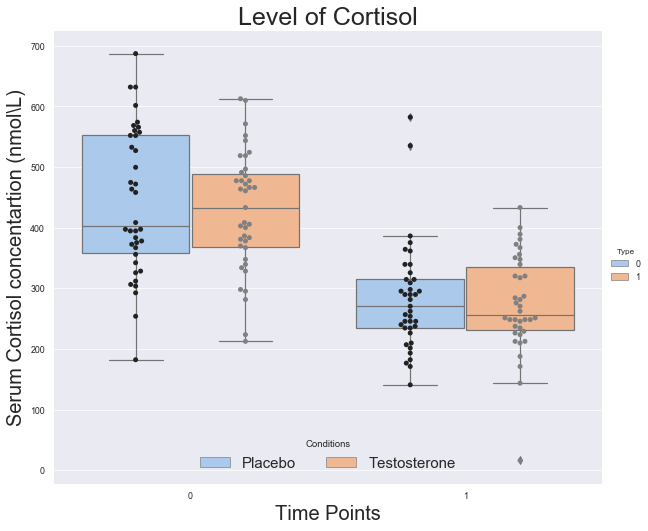

In [10]:
g = sns.catplot(x="Time", y="Cortisol",hue="Type", data=df, kind="box",palette="pastel", height=7,aspect=1.2);
g = sns.swarmplot(x="Time", y="Cortisol",hue="Type",data=df,color="grey", edgecolor="black", dodge=True);
plt.title('Level of Cortisol', fontsize=25)
# add legends
handles, _ = g.get_legend_handles_labels()
g.legend(handles, ["Placebo", "Testosterone"],title="Conditions", prop={"size":15},frameon=False, loc='lower center', ncol=2)
# Set x-axis label
plt.xlabel('Time Points', fontsize=20)
# Set y-axis label
plt.ylabel('Serum Cortisol concentartion (nmol\L)', fontsize=20)
plt.savefig("C_level.eps")
plt.savefig("C_level.jpg")

## Plot testostrone values for T0 and T1 separately for
## Placebo and Testosterone conditions

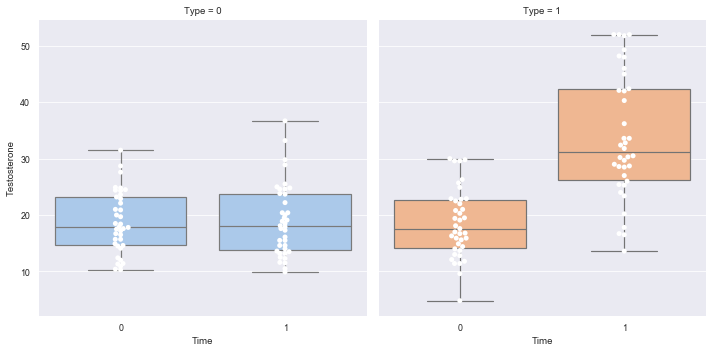

In [11]:
g = sns.FacetGrid(df, col="Type", hue = "Type", height = 5, palette="pastel")
def fixed_boxplot(*args, label=None, **kwargs):
    sns.boxplot(*args, **kwargs, labels=[label])
g = g.map(sns.swarmplot, 'Time', 'Testosterone', order=[0, 1], hue_order=[0, 1],color="white")
g = g.map(fixed_boxplot, 'Time', 'Testosterone', order=[0, 1], hue_order=[0, 1])

## Plot Cortisol values for T0 and T1 separately for
## Placebo and Testosterone conditions

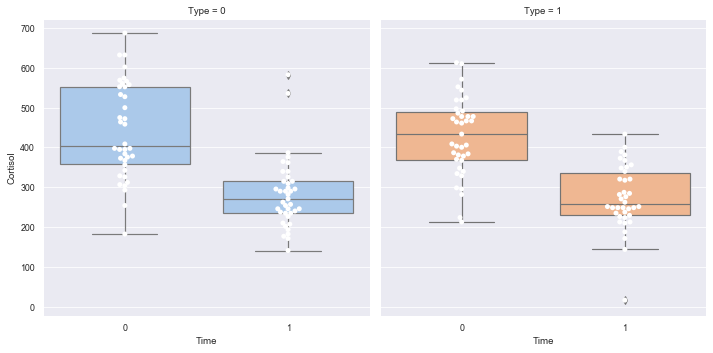

In [12]:
g = sns.FacetGrid(df, col="Type", hue = "Type", height = 5, palette="pastel")
def fixed_boxplot(*args, label=None, **kwargs):
    sns.boxplot(*args, **kwargs, labels=[label])
g = g.map(sns.swarmplot, 'Time', 'Cortisol', order=[0, 1], hue_order=[0, 1],color="white")
g = g.map(fixed_boxplot, 'Time', 'Cortisol', order=[0, 1], hue_order=[0, 1])

## Changing transparency

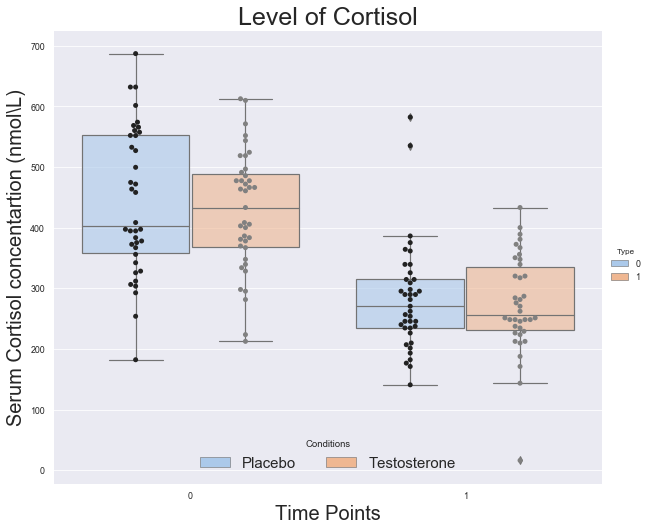

In [13]:

g = sns.catplot(x="Time", y="Cortisol",hue="Type", data=df, kind="box",palette="pastel", height=7,aspect=1.2);
g = sns.swarmplot(x="Time", y="Cortisol",hue="Type",data=df,color="grey", edgecolor="black", dodge=True);
plt.title('Level of Cortisol', fontsize=25)
# add legends
handles, _ = g.get_legend_handles_labels()
g.legend(handles, ["Placebo", "Testosterone"],title="Conditions", prop={"size":15},frameon=False, loc='lower center', ncol=2)
# Set x-axis label
plt.xlabel('Time Points', fontsize=20)
# Set y-axis label
plt.ylabel('Serum Cortisol concentartion (nmol\L)', fontsize=20)
# Add transparency to colors
for patch in g.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))



## Plot 2 in one

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


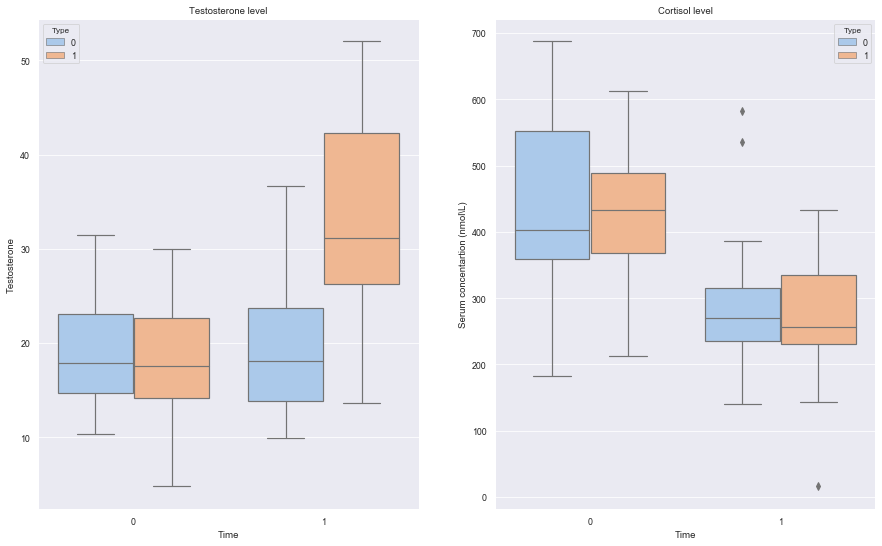

In [14]:
fig, axarr = plt.subplots(1,2,figsize=(15,9))
a = sns.boxplot(x="Time", y="Testosterone",hue="Type",palette="pastel", data=df,
                ax=axarr[0]).set_title('Testosterone level')
axarr[1].set_title('Cortisol level')
b = sns.boxplot(x="Time", y="Cortisol",hue="Type",palette="pastel", data=df, ax=axarr[1]).set_ylabel('Serum concentartion (nmol\L)')
plt.savefig("T_and_C_level.eps")
plt.savefig("T_and_C_level.jpg")